## Exercise 9

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC,LinearSVC
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)


list(mnist.keys())

['data',
 'target',
 'frame',
 'categories',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'url']

In [2]:
X=mnist['data']
y=mnist['target'].astype(np.uint8)

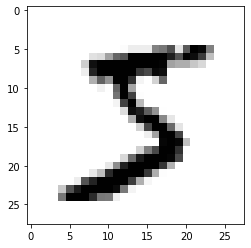

In [3]:
#Example of an image
X_image = X[0].reshape((28,28))
plt.imshow(X_image, cmap='binary')
plt.show()

In [4]:
#Divide train and test sets

X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [5]:
#Fit the Linear SVClassifier
l_svc = LinearSVC()
l_svc.fit(X_train,y_train)

C:\Users\ajime\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [6]:
#Output prediction and estimate accuracy

y_pred = l_svc.predict(X_train)
accuracy_score(y_train, y_pred)

0.8666

That is a not so good score for this dataset, let's try standard scaling the features

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [8]:
#Let's try the linear classifier again

# l_svc.fit(X_scaled, y_train)

In [9]:
import joblib

l_svc = joblib.load('lsvc.sav')

In [10]:
y_pred = l_svc.predict(X_scaled)
accuracy_score(y_train, y_pred)

0.9207

Now let's try other SVM kernels

In [11]:
svc = SVC()

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svc, param_distributions, n_iter=50, verbose=3, cv=3,n_jobs=-1)
rnd_search_cv.fit(X_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   34.3s finished


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EA1D1DB670>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EA1D1DBC10>},
                   verbose=3)

In [13]:
rnd_search_cv.best_params_

{'C': 7.488225920754055, 'gamma': 0.0010521290303499727}

In [14]:
rnd_search_cv.best_score_

0.8639927352502204

In [15]:
rnd_search_cv.best_estimator_.fit(X_scaled, y_train)

SVC(C=7.488225920754055, gamma=0.0010521290303499727)

In [18]:
X_test_scaled = scaler.transform(X_test)

In [19]:
y_pred = rnd_search_cv.predict(X_test_scaled)

In [20]:
accuracy_score(y_test, y_pred)

0.9729

In [21]:
joblib.dump(rnd_search_cv,'rnd_svc')

['rnd_svc']